In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

resultfolder = 'data_aug'

# General csv file with results per iteration
df_log = []
df_val = []
df_train = []
class_names = ['non-damage', 'delamination', 'rebar-exposure']

i=0

df_log.append(pd.read_csv('results/{}/{}_log.csv'.format(resultfolder, i)))
df_iu_cls = pd.read_csv('results/{}/{}_iu_cls.csv'.format(resultfolder, i), header=None)
df_iu_cls = df_iu_cls.dropna(axis=1, how='all')
df_iu_cls = df_iu_cls.drop(axis=1, columns=[0])
names = ['epoch', 'iter', 'train_iou', 'valid_iou']
df_iu_cls.columns = names

temp = df_iu_cls[['train_iou','valid_iou', 'epoch']]

df_val.append(pd.DataFrame.from_records(temp['valid_iou'].map(lambda x: x[1:-1].split()).tolist(), columns=class_names).astype('float32'))
df_train.append(pd.DataFrame.from_records(temp['train_iou'].map(lambda x: x[1:-1].split()).tolist(), columns=class_names).astype('float32'))

np_train = np.array(df_train[i].as_matrix())
np_val = np.array(df_val[i].as_matrix())
np_epoch = np.array(temp.as_matrix(columns=['epoch']))



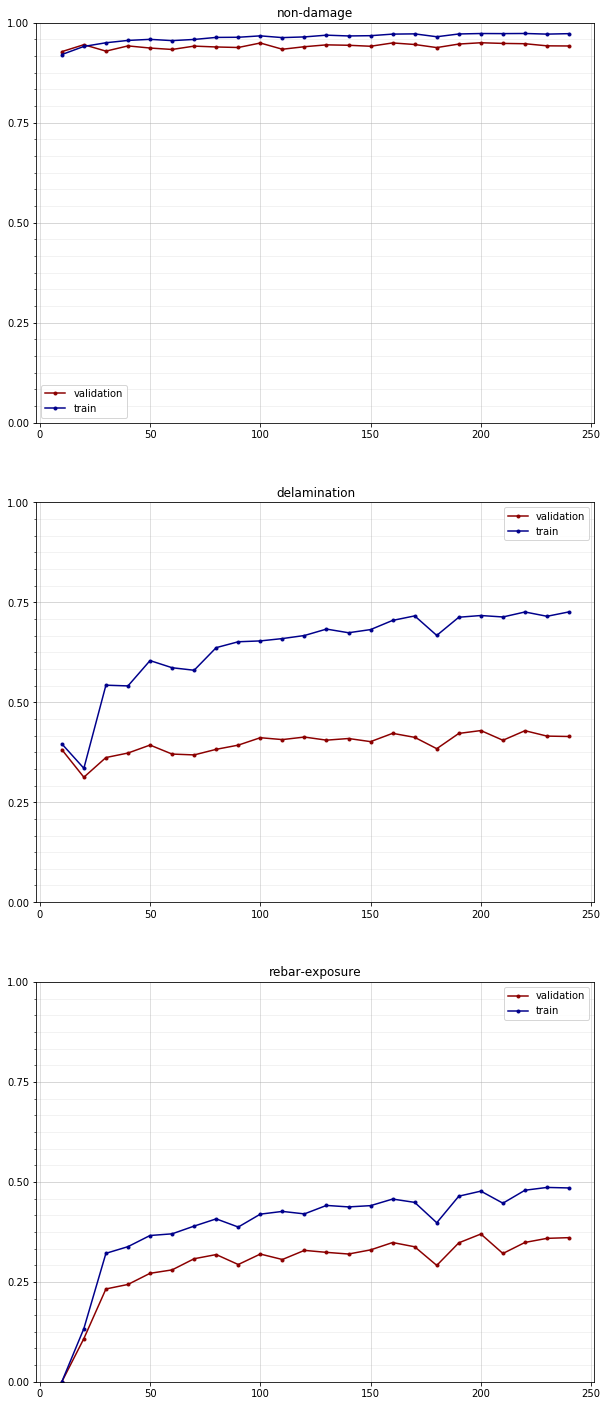

In [21]:
#uses the stdiance for error bars
figure, axarr = plt.subplots(3, sharex=False, figsize=(10, 25))
plots = ['']
for i in range(len(class_names)):

   axarr[i].plot(np_epoch, np_val[:,i], marker='.', color='darkred', label='validation')
   axarr[i].plot(np_epoch, np_train[:,i], marker='.', color='darkblue', label='train')
   axarr[i].set_title(class_names[i])
   axarr[i].autoscale(False) 
   axarr[i].set_ylim([0,1])
   axarr[i].legend()
    
   major_ticks = np.linspace(0., 1., 5)
   minor_ticks = np.linspace(0., 1., 25)
   axarr[i].set_yticks(major_ticks)
   axarr[i].set_yticks(minor_ticks, minor=True)
   axarr[i].grid(which='minor', alpha=0.2)
   axarr[i].grid(which='major', alpha=0.5)
 

plt.show()